In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import struct
%matplotlib widget

import torch

from torch import nn
import torch.nn.functional as F

from torch import optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
class MnistDataset(Dataset):
    def __init__(self, path):
        super().__init__()
        
        images = self.load_images(f"{path}-images.idx3-ubyte")
        labels = self.load_labels(f"{path}-labels.idx1-ubyte")
        
        self.data = list(zip(images, labels))
    
    def load_images(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_images = struct.unpack(">I", fp.read(4))[0]
            rows = struct.unpack(">I", fp.read(4))[0]
            cols = struct.unpack(">I", fp.read(4))[0]
            images = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, 1, rows, cols))
            images = images.astype(np.float32)/255
            return images
    
    def load_labels(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_labels = struct.unpack(">I", fp.read(4))[0]
            labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
            return labels
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return len(self.data)

In [3]:
mnist_train = MnistDataset("train")
mnist_train_ds = DataLoader(mnist_train, batch_size=32, shuffle=True)

mnist_test = MnistDataset("t10k")
mnist_test_ds = DataLoader(mnist_test, batch_size=5, shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, 3, padding=1)
        self.conv2 = nn.Conv2d(5, 10, 3, padding=1)
        
        self.l1 = nn.Linear(10*28*28, 500)
        self.l2 = nn.Linear(500, 10)
        
    def forward(self, x):
        conv1_out = F.relu(self.conv1(x))
        conv2_out = F.relu(self.conv2(conv1_out))
        conv2_out = conv2_out.view(-1, 10*28*28)        
        l1_out = F.relu(self.l1(conv2_out))
        l2_out = F.tanh(self.l2(l1_out))
        return l2_out

In [5]:
net = Net()

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.85)

total_data = len(mnist_train_ds)
total_epochs = 1

for epoch in range(total_epochs):
    for i, data in enumerate(mnist_train_ds):
        x, y = data[0], data[1]
        optimizer.zero_grad()
        yp = net(x)
        loss = criterion(yp, y)
        loss.backward()
        optimizer.step()
    print(epoch)

e:\singidunum\materijali\singi_ml_venv\lib\site-packages\torch\nn\functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


0


In [7]:
with torch.no_grad():
    tacnih = 0
    for i, data in enumerate(mnist_test_ds):
        x, y = data[0], data[1]
        yp = torch.argmax(net(x), 1)
        tacnih += (y == yp).sum().item()
    print(f"Tacnost: {100*(tacnih/len(mnist_test))}%")

Tacnost: 93.07%


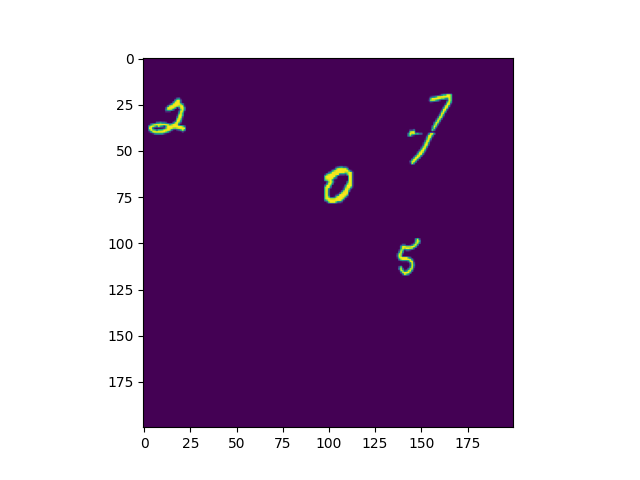

In [8]:
velika_slika = np.zeros((200, 200))

slike = iter(mnist_test_ds).next()
koordinate = np.random.randint(0, 200-28, size=(5, 2))

for i, s in enumerate(slike[0]):
    velika_slika[koordinate[i][0]:koordinate[i][0]+28, koordinate[i][1]:koordinate[i][1]+28] = s[0].numpy()

plt.figure()    
plt.imshow(velika_slika)
plt.show()

In [9]:
nova_slika = np.zeros((200, 200))

for i in range(0, 200-28, 1):
    for j in range(0, 200-28, 1):
        deo_slike = torch.from_numpy(velika_slika[i:i+28, j:j+28].reshape(1, 28, 28).astype(np.float32))
        r = net(deo_slike).max() > 0.95
        if r == True:
            nova_slika[i:i+28, j:j+28] += 1

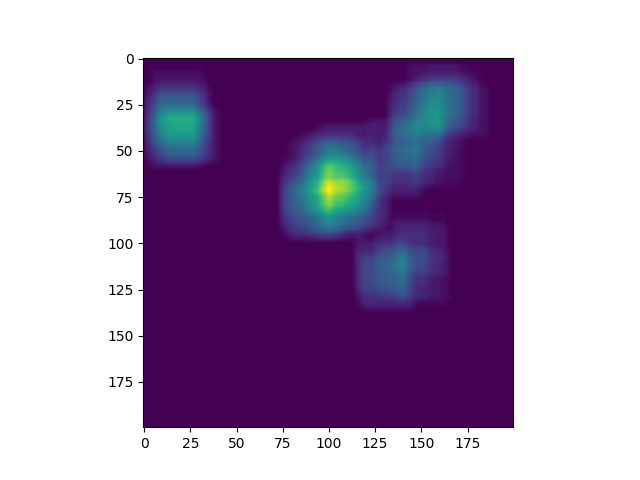

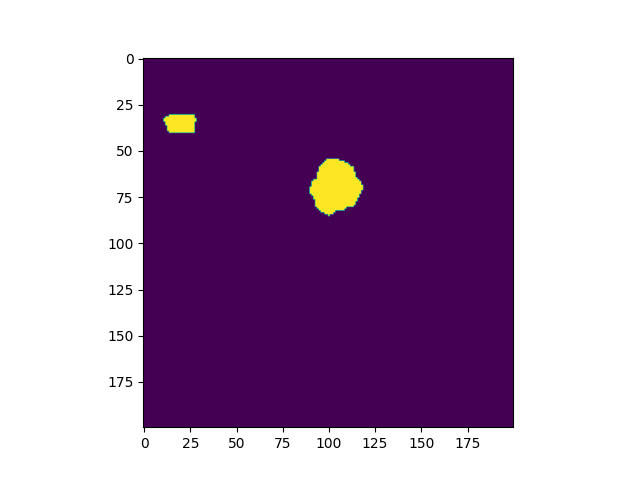

In [10]:
plt.figure()
plt.imshow(nova_slika)
plt.show()

plt.figure()
plt.imshow(nova_slika>200)
plt.show()

In [11]:
nova_slika = np.zeros((10, 200, 200))

for i in range(0, 200-28, 1):
    for j in range(0, 200-28, 1):
        deo_slike = torch.from_numpy(velika_slika[i:i+28, j:j+28].reshape(1, 28, 28).astype(np.float32))
        r = net(deo_slike)
        if (r.max() > 0.95) == True:
            nova_slika[r.argmax()][i:i+28, j:j+28] += 1

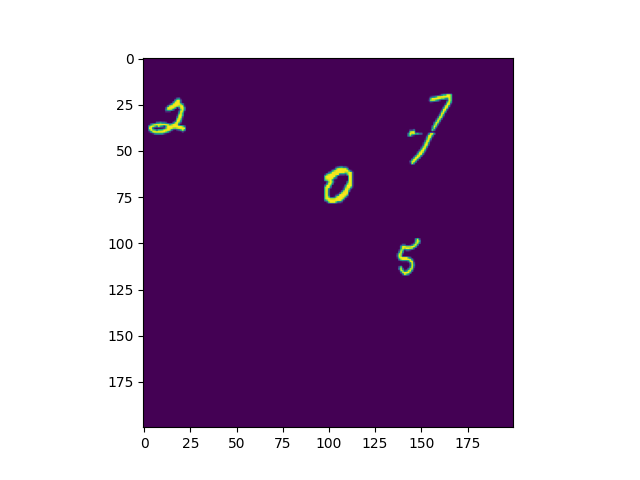

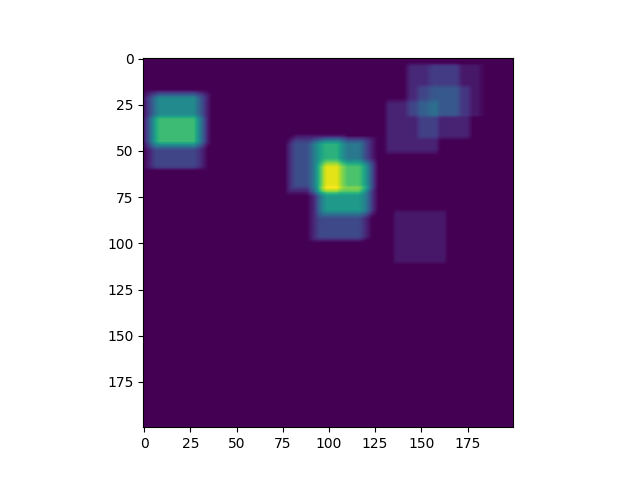

C:\Users\Ivan\AppData\Local\Temp\ipykernel_6900\2723213089.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


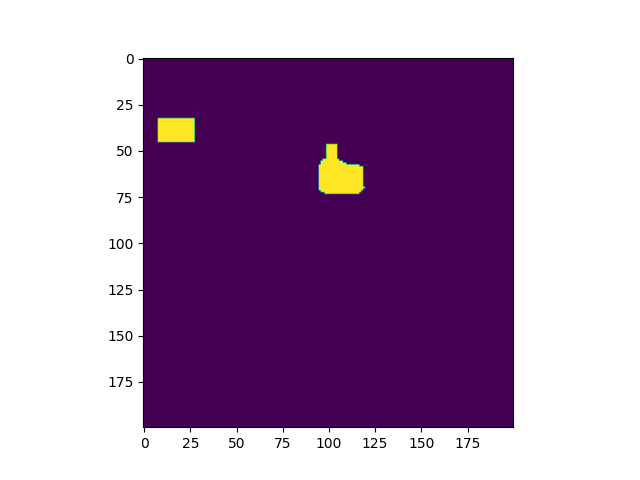

In [17]:
plt.figure()
plt.imshow(velika_slika)
plt.show()

plt.figure()
plt.imshow(nova_slika[2])
plt.show()

plt.figure()
plt.imshow(nova_slika[2]>60)
plt.show()